In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
spam=pd.read_csv('spam.csv')

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
spam.shape

(5572, 5)

In [5]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
spam.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
spam.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
spam.duplicated().sum()

403

In [10]:
spam=spam.drop_duplicates(keep='first')

In [11]:
spam['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

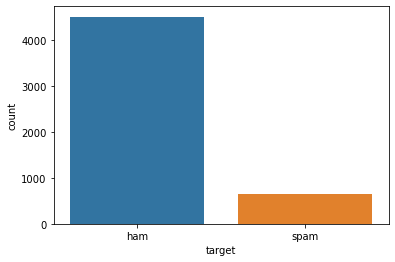

In [12]:
sns.countplot(x='target',data=spam)

In [13]:
spam['length']=spam['text'].apply(len)

In [14]:
spam.head()

,target,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
spam['target']=lb.fit_transform(spam['target'])

In [16]:
spam.head()

,target,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


0 for HAM
1 for SPAM

In [47]:
import re
import random
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
spam['number_char'] = spam['text'].apply(len)

In [51]:
spam['number_words'] = spam['text'].apply(lambda x: len(nltk.word_tokenize(x)))
spam.head()

,level_0,index,target,text,length,number_char,number_words
0,0,0,0,"Go until jurong point, crazy.. Available only ...",111,111,24
1,1,1,0,Ok lar... Joking wif u oni...,29,29,8
2,2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37
3,3,3,0,U dun say so early hor... U c already then say...,49,49,13
4,4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,15


In [52]:
spam['number_sentence'] = spam['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [53]:
spam.head()

,level_0,index,target,text,length,number_char,number_words,number_sentence
0,0,0,0,"Go until jurong point, crazy.. Available only ...",111,111,24,2
1,1,1,0,Ok lar... Joking wif u oni...,29,29,8,2
2,2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2
3,3,3,0,U dun say so early hor... U c already then say...,49,49,13,1
4,4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,15,1


In [54]:
spam.describe()

,level_0,index,target,length,number_char,number_words,number_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000
mean,2584.000000,2734.699362,0.126330,78.923776,78.923776,18.456375,1.962275
std,1492.306101,1613.241267,0.332253,58.174846,58.174846,13.323322,1.433892
min,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000
25%,1292.000000,1331.000000,0.000000,36.000000,36.000000,9.000000,1.000000
50%,2584.000000,2703.000000,0.000000,60.000000,60.000000,15.000000,1.000000
75%,3876.000000,4129.000000,0.000000,117.000000,117.000000,26.000000,2.000000
max,5168.000000,5571.000000,1.000000,910.000000,910.000000,220.000000,38.000000


In [55]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [56]:
import string

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [58]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]#copying list
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [59]:
spam['transform_text'] = spam['text'].apply(transform)

In [60]:
spam.head()

,level_0,index,target,text,length,number_char,number_words,number_sentence,transform_text
0,0,0,0,"Go until jurong point, crazy.. Available only ...",111,111,24,2,go jurong point crazi avail bugi n great world...
1,1,1,0,Ok lar... Joking wif u oni...,29,29,8,2,ok lar joke wif u oni
2,2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,3,3,0,U dun say so early hor... U c already then say...,49,49,13,1,u dun say earli hor u c alreadi say
4,4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,15,1,nah think goe usf live around though


In [62]:
from wordcloud import WordCloud

In [63]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color='white')

In [65]:
spam_wordcloud = wc.generate(spam[spam['target'] == 1]['transform_text'].str.cat(sep = " "))

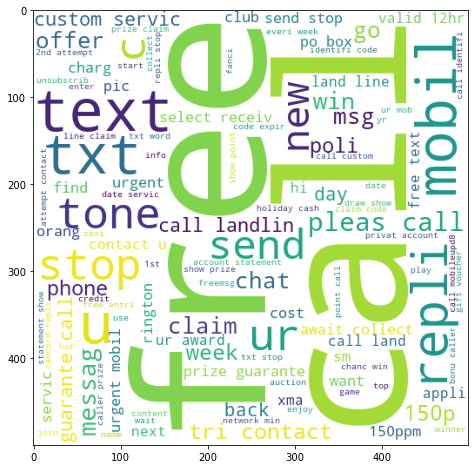

In [66]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wordcloud)

In [67]:
spam_wordcloud = wc.generate(spam[spam['target'] == 0]['transform_text'].str.cat(sep = " "))

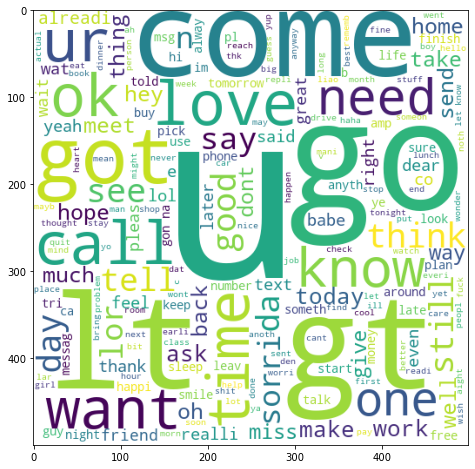

In [68]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wordcloud)

### MODEL

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [71]:
X = cv.fit_transform(spam['transform_text']).toarray()

In [72]:
X.shape

(5169, 6677)

In [74]:
y = spam['target'].values

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [79]:
from sklearn.metrics import classification_report

In [80]:
gnb.fit(X_train, y_train)
pred1 = gnb.predict(X_test)

In [81]:
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       889
           1       0.51      0.87      0.65       145

    accuracy                           0.87      1034
   macro avg       0.75      0.87      0.78      1034
weighted avg       0.91      0.87      0.88      1034



In [82]:
mnb.fit(X_train, y_train)
pred2 = mnb.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034



In [83]:
bnb.fit(X_train, y_train)
pred3 = bnb.predict(X_test)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.92      1034
weighted avg       0.97      0.97      0.96      1034

